In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [7]:
data = pd.read_csv("/content/Health_insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
row, columns = data.shape
print("Row: ",row)
print("columns: ",columns)

Row:  1338
columns:  7


In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
categ_col = data[["sex","smoker","region"]]
for col in categ_col:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [13]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


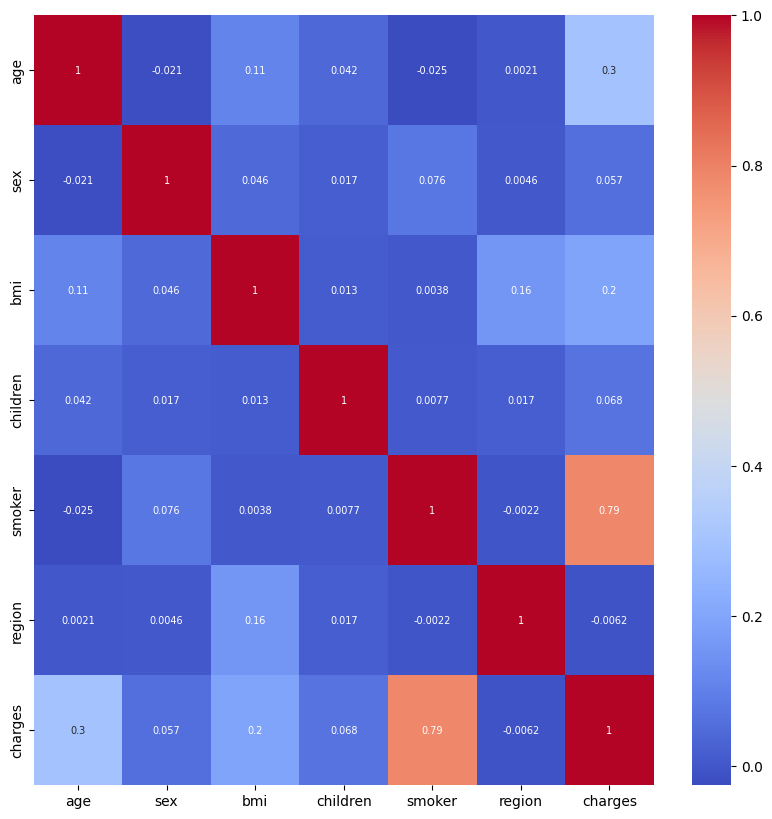

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "coolwarm", annot=True, ax=ax, annot_kws={"size": 7})

In [16]:
figure = px.histogram(data, x = "charges", color = "smoker", title= "Number of Smokers")
figure

In [17]:
figure = px.histogram(data, x = "bmi", color = "smoker", title= "Number of Smokers")
figure.show()

In [18]:
figure = px.histogram(data, x = "children", color = "smoker", title= "Number of Smokers")
figure.show()

In [19]:
pie = data["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data, values=population, names=regions)
fig

In [20]:
x = np.array(data[["age", "sex", "bmi", "smoker"]])
y = np.array(data["charges"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [23]:
ypred = forest.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
data

,Predicted Premium Amount
0,10334.080349
1,5330.328600
2,28432.908066
3,10115.971844
4,34654.312201
...,...
263,47303.350130
264,12596.124606
265,6293.531939
266,47021.490170
